Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [1]:
# %%capture
# import sys

# # If you're on Colab:
# if 'google.colab' in sys.modules:
#     DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/main/data/'
#     !pip install category_encoders==2.*
#     !pip install pandas-profiling==2.*
    
# # If you're working locally:
# else:
#     DATA_PATH = '../data/'

In [2]:
#def wrangle(fm_path, tv_path=None):
#     if tv_path:
#         df = pd.merge(pd.read_csv(fm_path, 
#                                   na_values=[0, -2.000000e-08]),
#                       pd.read_csv(tv_path)).set_index('id')
#     else:
#         df = pd.read_csv(fm_path, 
#                          na_values=[0, -2.000000e-08],
#                          index_col='id')

#     # Drop constant columns
#     df.drop(columns=['recorded_by'], inplace=True)

#     # Drop HCCCs
#     cutoff = 100
#     drop_cols = [col for col in df.select_dtypes('object').columns
#                  if df[col].nunique() > cutoff]
#     df.drop(columns=drop_cols, inplace=True)

#     # Drop duplicate columns
#     dupe_cols = [col for col in df.head(15).T.duplicated().index
#                  if df.head(15).T.duplicated()[col]]
#     df.drop(columns=dupe_cols, inplace=True)  

# Module Project: Decision Trees

This week, the module projects will focus on creating and improving a model for the Tanazania Water Pump dataset. Your goal is to create a model to predict whether a water pump is functional, non-functional, or needs repair.

Dataset source: [DrivenData.org](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/).

## Directions

The tasks for this project are as follows:

- **Task 1:** Sign up for a [Kaggle](https://www.kaggle.com/) account.
- **Task 2:** Use `wrangle` function to import training and test data.
- **Task 3:** Split training data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build and train `model_dt`.
- **Task 7:** Calculate the training and validation accuracy score for your model.
- **Task 8:** Adjust model's `max_depth` to reduce overfitting.
- **Task 9 `stretch goal`:** Create a horizontal bar chart showing the 10 most important features for your model.

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `pandas-profiling`
- `sklearn`

# Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. **We recommend that you choose a username that's based on your name, since you might include it in your resume in the future.** Go to our Kaggle InClass competition website (the URL is in Slack). Go to the **Rules** page. Accept the rules of the competition. Notice that the **Rules** page also has instructions for the Submission process. The **Data** page has feature definitions.

# I. Wrangle Data

In [3]:
def wrangle(temp_df):
    #set row index to 'id column
    temp_df.set_index('id', inplace = True)
    
    #Drop the constant column 'recorded by' and the duplicate column 'quantity group'
    df.drop(columns=['recorded_by', 'quantity_group'], inplace = True, errors='ignore')

    #Drop HCCCs
    cutoff = 100
    drop_cols = [col for col in df.select_dtypes('object').columns
                 if df[col].nunique() > cutoff]
    df.drop(columns=drop_cols, inplace=True)

    #Drop duplicate columns and account for the difference in X_test
    dupe_cols = [col for col in df.head(15).T.duplicated().index
                 if df.head(15).T.duplicated()[col]]
    df.drop(columns=dupe_cols, inplace=True)     
    # Drop High-Cardinality Columns
    cols_to_drop = [col for col in df.select_dtypes('object') if df[col].nunique() > 100]
    df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
    
    # Drop columns with a high proportion of null values\
    df.drop(columns='num_private', inplace=True, errors='ignore')
    
    return temp_df

**Task 1:** Using the `wrangle` function above, read the `train_features.csv` and  `train_labels.csv` files into the DataFrame `df`. Next, use the same function to read the test set `test_features.csv` into the DataFrame `X_test`.

In [4]:
import pandas as pd

In [5]:
df = pd.merge(pd.read_csv(r'waterpumps/train_features.csv', na_values = [0]),
     pd.read_csv(r'waterpumps/train_labels.csv', na_values = [0]))

In [6]:
train = wrangle(df)

In [7]:
train.shape

(59400, 28)

### (59400, 29)

In [8]:
# X_test = ...
X_test = pd.read_csv(r'waterpumps/test_features.csv')

In [9]:
X_test = wrangle(X_test)

In [29]:
X_test.shape

(14358, 39)

In [10]:
X_test.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [11]:
X_test.shape

(14358, 39)

### (14358, 39)

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'status_group'`.

In [12]:
# X = ...
# y = ...
target = 'status_group'
y = train[target]
X = train.drop(columns = target)

**Task 4:** Using a randomized split, divide `X` and `y` into a training set (`X_train`, `y_train`) and a validation set (`X_val`, `y_val`).

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2, random_state = 5)

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents.

In [ ]:
y_train.value_counts(normalize=True)
majority_class=y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

In [15]:
# baseline_acc = ...
baseline_acc = y_train.value_counts(normalize = True).max()*100
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 54.1266835016835


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_dt`, and fit it to your training data. Your `Pipeline` should include:

- an `OrdinalEncoder` transformer for categorical features.
- a `SimpleImputer` transformer fot missing values.
- a `DecisionTreeClassifier` predictor.

**Note:** Don't forget to set the `random_state` parameter for your `DecisionTreeClassifier`.

In [16]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [17]:
# model_dt = ...
model_dt = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(strategy= 'mean'),
      DecisionTreeClassifier(max_depth= 16, random_state= 42)
                         )

model_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type',
                                      'waterpoint_type_group'],
                                mapping=[...
communal standpipe multiple    2
other                          3
hand pump                      4
improved spring                5
cattle trough                  6
dam                            7
NaN                           -2
dtyp

# V. Check Metrics

**Task 7:** Calculate the training and validation accuracy scores for `model_dt`.

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
# training_acc = ...
# val_acc = ...
training_acc = accuracy_score(y_train, model_dt.predict(X_train))
val_acc = accuracy_score(y_val, model_dt.predict(X_val))

print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.8780513468013468
Validation Accuracy Score: 0.7652356902356903


# VI. Tune Model

**Task 8:** Is there a large difference between your training and validation accuracy? If so, experiment with different setting for `max_depth` in your `DecisionTreeClassifier` to reduce the amount of overfitting in your model.

In [20]:
# Use this cell to experiment and then change 
# your model hyperparameters in Task 6
depths = range(14, 20, 1)  # These reflect different max depth values
list(depths)

[14, 15, 16, 17, 18, 19]

In [21]:
train_acc = []
val_acc = []

for depth in depths:
   
  tree_model = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(),
      DecisionTreeClassifier(max_depth=depth, random_state=42)
                            )

  tree_model.fit(X_train, y_train)
  train_acc.append(tree_model.score(X_train, y_train))
  val_acc.append(tree_model.score(X_val, y_val))

In [22]:
val_acc

[0.763973063973064,
 0.762962962962963,
 0.7652356902356903,
 0.7671717171717172,
 0.767003367003367,
 0.7644781144781144]

In [23]:
train_acc

[0.8418560606060606,
 0.8589436026936027,
 0.8780513468013468,
 0.8944654882154882,
 0.911679292929293,
 0.9256523569023569]

In [24]:
import matplotlib.pyplot as plt

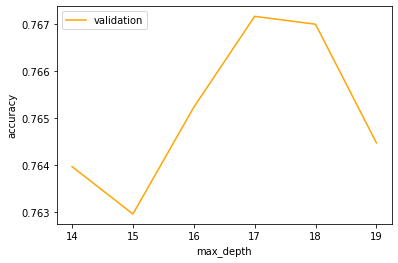

In [25]:
#plt.plot(depths, train_acc, color='blue', label='training')
plt.plot(depths, val_acc, color='orange', label='validation')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# VII. Communicate Results

**Task 9 `stretch goal`:** Create a horizontal barchart that shows the the 10 most important features for model_dt, sorted by value.

**Note:** [`DecisionTreeClassifier.feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreecla#sklearn.tree.DecisionTreeClassifier.feature_importances_) returns values that are different from [`LogisticRegression.coef_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). All the values will be positive, and they will sum to `1`.

Text(0, 0.5, 'features')

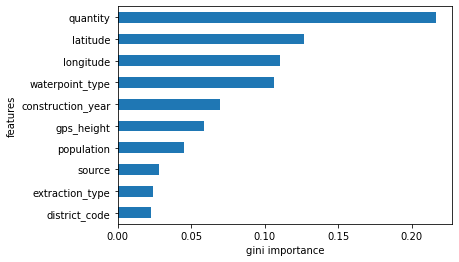

In [26]:
features = model_dt.named_steps['ordinalencoder'].get_feature_names()
gini = model_dt.named_steps['decisiontreeclassifier'].feature_importances_

pd.Series(data= gini, index= features).sort_values(key=abs).tail(10).plot(kind= 'barh')
plt.xlabel('gini importance')
plt.ylabel('features')

In [27]:
#  X_test and X_train dont have the same shape?
print(X_test.shape)
print(X.shape)
print(y.shape)

(14358, 39)
(59400, 27)
(59400,)


In [28]:
model_dt.predict(X_test)

ValueError: Unexpected input dimension 39, expected 27

In [ ]:
predictions = pd.DataFrame(data=model_dt.predict(X_test), index=X_test.index)

predictions.columns = ['status_group']

predictions.head()

In [ ]:
# idk how to do prediction.